In [17]:
library(reshape2)
library(ggplot2)
library(cowplot)

In [7]:
IDTypeClusterCount <- read.csv('~/research/irishCovidIntros/analysis/outputFiles/clusters/NorthernIrelandIDTypeClusterSharedWithRoISampleCount.csv')
IDTypeClusterCountTable <- dcast(IDTypeClusterCount, type~irish_in_cluster, value.var = "tip")
rownames(IDTypeClusterCountTable) <- IDTypeClusterCountTable[,1]
IDTypeClusterCountTable[,1] <- NULL
IDTypeClusterCountTable[is.na(IDTypeClusterCountTable)] <- 0

In [8]:
IDTypeClusterCountTable

,N,Y
,<dbl>,<dbl>
ALDP,15,9
BRBR,6,3
CAMC,3,7
DHSC,1,0
HSLL,3,1
LSPA,3,0
MILK,30,13
NEWC,1,2
NIRE,3453,8254


In [9]:
IDTypeClusterCountTableWithoutSmallSampleSizes <- IDTypeClusterCountTable[IDTypeClusterCountTable$N+IDTypeClusterCountTable$Y > 15, ]
IDTypeClusterCountTableWithoutSmallSampleSizes

,N,Y
,<dbl>,<dbl>
ALDP,15,9
MILK,30,13
NIRE,3453,8254
NORT,228,486
OXON,12,31
PHEC,487,134
QEUH,26,41
RAND,589,1468


In [10]:
(Xsq <- chisq.test(IDTypeClusterCountTableWithoutSmallSampleSizes))
Xsq$observed
Xsq$expected
Xsq$stdres


	Pearson's Chi-squared test

data:  IDTypeClusterCountTableWithoutSmallSampleSizes
X-squared = 702.68, df = 7, p-value < 2.2e-16


,N,Y
ALDP,15,9
MILK,30,13
NIRE,3453,8254
NORT,228,486
OXON,12,31
PHEC,487,134
QEUH,26,41
RAND,589,1468


,N,Y
ALDP,7.604085,16.39592
MILK,13.623985,29.37601
NIRE,3709.209217,7997.79078
NORT,226.221524,487.77848
OXON,13.623985,29.37601
PHEC,196.755695,424.24430
QEUH,21.228070,45.77193
RAND,651.733438,1405.26656


,N,Y
ALDP,3.2474888,-3.2474888
MILK,5.3753411,-5.3753411
NIRE,-10.5298801,10.5298801
NORT,0.1465255,-0.1465255
OXON,-0.5330647,0.5330647
PHEC,25.5593470,-25.5593470
QEUH,1.2558306,-1.2558306
RAND,-3.1960046,3.1960046


Var1,Var2,value
<fct>,<fct>,<dbl>
ALDP,N,3.2474888
MILK,N,5.3753411
NIRE,N,-10.5298801
NORT,N,0.1465255
OXON,N,-0.5330647
PHEC,N,25.5593470
QEUH,N,1.2558306
RAND,N,-3.1960046
ALDP,Y,-3.2474888


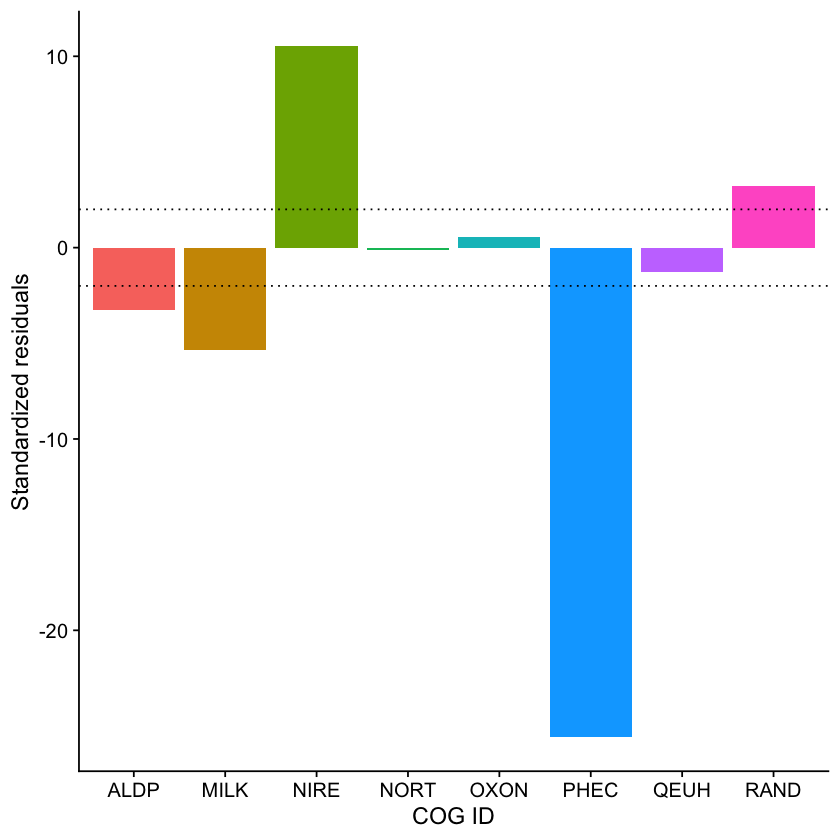

In [27]:
stdres_melted <- melt(Xsq$stdres)

ggplot(stdres_melted[ which(stdres_melted$Var2=='Y'), ], aes(x = Var1, y = value, fill=Var1)) + geom_col() + theme_cowplot() + geom_hline(yintercept = 2,linetype="dotted") + geom_hline(yintercept = -2,linetype="dotted") + labs(x="COG ID", y="Standardized residuals") + theme(legend.position = 'none')

#### Shared with NIRE

In [29]:
IDTypeClusterCountNIRE <- read.csv('~/research/irishCovidIntros/analysis/outputFiles/clusters/NorthernIrelandIDTypeClusterSharedWithNIRESampleCount.csv')
IDTypeClusterCountNIRETable <- dcast(IDTypeClusterCountNIRE, type~NIRE_in_cluster, value.var = "tip")
rownames(IDTypeClusterCountNIRETable) <- IDTypeClusterCountNIRETable[,1]
IDTypeClusterCountNIRETable[,1] <- NULL
IDTypeClusterCountNIRETable[is.na(IDTypeClusterCountNIRETable)] <- 0

In [30]:
IDTypeClusterCountNIRETable

,N,Y
,<dbl>,<dbl>
ALDP,14,10
BRBR,6,3
CAMC,2,8
DHSC,1,0
HSLL,3,1
LSPA,2,1
MILK,23,20
NEWC,0,3
NORT,77,637


In [31]:
IDTypeClusterCountNIRETableWithoutSmallSampleSizes <- IDTypeClusterCountNIRETable[IDTypeClusterCountNIRETable$N+IDTypeClusterCountNIRETable$Y > 15, ]
IDTypeClusterCountNIRETableWithoutSmallSampleSizes

,N,Y
,<dbl>,<dbl>
ALDP,14,10
MILK,23,20
NORT,77,637
OXON,6,37
PHEC,483,138
QEUH,41,26
RAND,264,1793


In [32]:
(Xsq <- chisq.test(IDTypeClusterCountNIRETableWithoutSmallSampleSizes))
Xsq$observed
Xsq$expected
Xsq$stdres


	Pearson's Chi-squared test

data:  IDTypeClusterCountNIRETableWithoutSmallSampleSizes
X-squared = 1229.6, df = 6, p-value < 2.2e-16


,N,Y
ALDP,14,10
MILK,23,20
NORT,77,637
OXON,6,37
PHEC,483,138
QEUH,41,26
RAND,264,1793


,N,Y
ALDP,6.105912,17.89409
MILK,10.939759,32.06024
NORT,181.650883,532.34912
OXON,10.939759,32.06024
PHEC,157.990474,463.00953
QEUH,17.045671,49.95433
RAND,523.327543,1533.67246


,N,Y
ALDP,3.712297,-3.712297
MILK,4.248495,-4.248495
NORT,-10.054146,10.054146
OXON,-1.740143,1.740143
PHEC,32.948907,-32.948907
QEUH,6.783331,-6.783331
RAND,-20.170193,20.170193


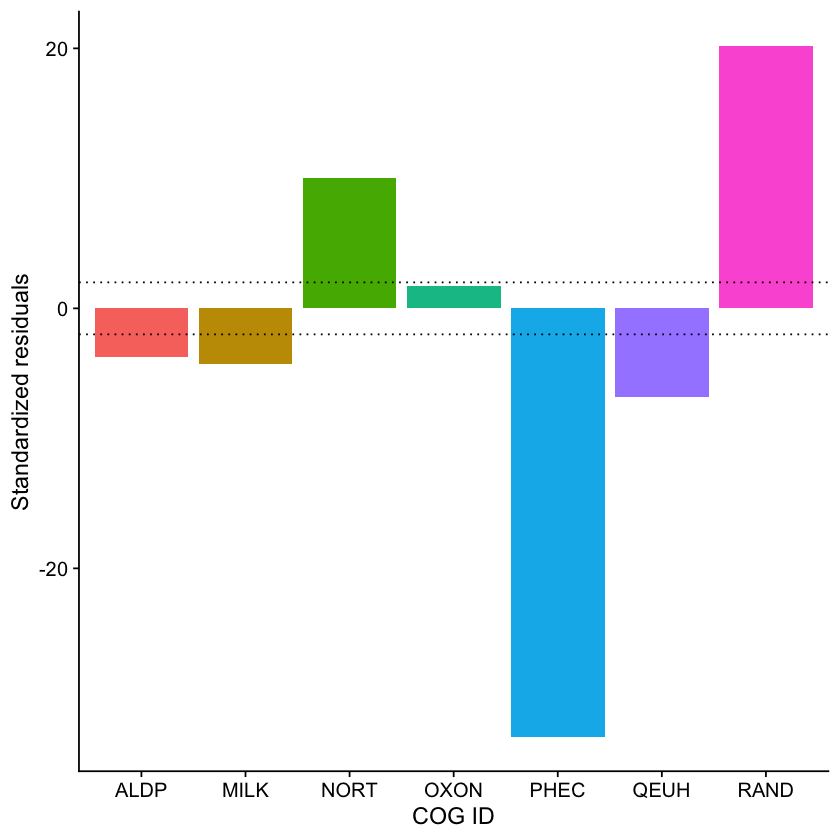

In [33]:
stdres_melted <- melt(Xsq$stdres)

ggplot(stdres_melted[ which(stdres_melted$Var2=='Y'), ], aes(x = Var1, y = value, fill=Var1)) + geom_col() + theme_cowplot() + geom_hline(yintercept = 2,linetype="dotted") + geom_hline(yintercept = -2,linetype="dotted") + labs(x="COG ID", y="Standardized residuals") + theme(legend.position = 'none')